In [1]:
from fineNeat.neat_src import loadHyp, updateHyp
from fineNeat.domain import load_task
from fineNeat.neat_src import DataGatherer, Neat 
from fineNeat.domain.config import games
from fineNeat.domain.task_gym import GymTask

game = games["slimevolley"]
task = GymTask(game)

hyp_default = 'fineNeat/fineNeat/p/default_sneat.json'
hyp_adjust = "fineNeat/fineNeat/p/volley.json"
fileName = "volley"

hyp = loadHyp(pFileName=hyp_default, load_task=load_task)
updateHyp(hyp,load_task,hyp_adjust)

hyp["cap_layer"] = 3
# neat = Neat(hyp)

In [2]:
def mutate(ind, p): 
    child, _ = ind.mutate(p=p)
    if child: 
       return child 
    else:
        return ind.safe_mutate(p)

In [3]:
from fineNeat import Ind
from tqdm import tqdm 
# import matplotlib.pyplot as plt 

# indiv_json = "runs/sneat_tune/sneat_00016000.json"
# ind = Ind.load(indiv_json)
ind = Ind.from_shapes([[3,10],[10, 10], [10,1]])
ind.express()


True

In [8]:
connG, nodeG, _ = ind.mutSparsity(p={"prob_mutTurnConn": 1.0, "sparsity_ratio": 0.4})
child = Ind(connG, nodeG)
child.express()

True

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

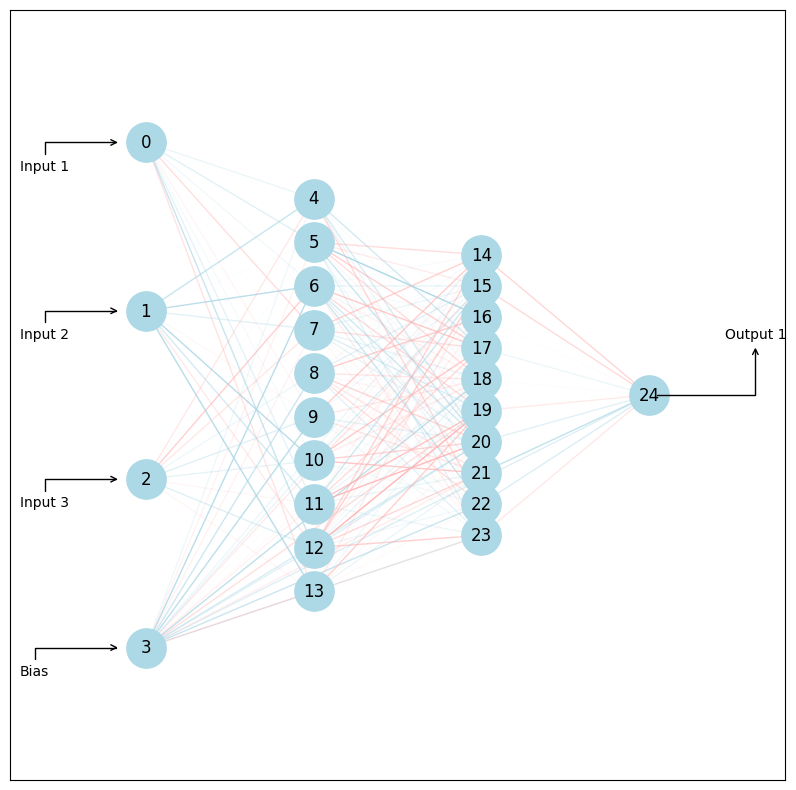

In [10]:
from fineNeat.vis import viewInd

viewInd(ind)

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

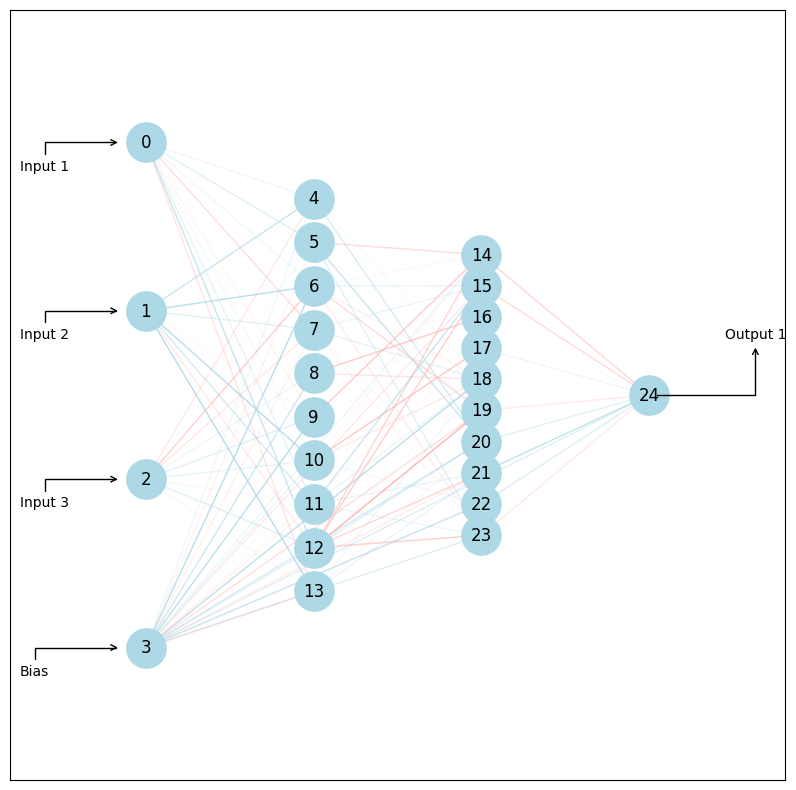

In [11]:
viewInd(child) # visualization is OFF --- check the output node ...


In [14]:
from fineNeat import viewInd, fig2img 
import matplotlib.pyplot as plt 
from tqdm import tqdm 

ind = Ind.from_shapes([[3,10],[10, 10], [10,1]])
frames = []
for i in tqdm(range(100)): 
    connG, nodeG, _ = ind.mutSparsity(p={"prob_mutTurnConn": 1.0, "sparsity_ratio": i/100})
    child = Ind(connG, nodeG)
    child.express()
    fig, ax = viewInd(child)
    frames.append(fig2img(fig))
    plt.close(fig)

frames[0].save("mutSparsity.gif", save_all=True, append_images=frames[1:], duration=100, loop=0) # save frames to gif

100%|██████████| 100/100 [00:28<00:00,  3.47it/s]


In [15]:
frames[-1].save("mutSparsity.gif", save_all=True, append_images=frames[:-1][::-1][:-10], duration=130, loop=0) # save frames to gif